## Use gensim for renerating summary of the comments, now using full file, and substituting 'left side', 'right side' with what it was (treatment or control).
## Trying to get files directly from COSMOS here via dbfs (doesn't work so far!)

In [1]:
from pprint import pprint as print
from gensim.summarization import summarize
from gensim.summarization import keywords, mz_keywords
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [4]:
#accessing files direclty, as from databricks, using dbfs
# https://aad.cosmos09.osdinfra.net/cosmos/MSN.DnI/shares/UDC/RnR/users/v-zhuozh/SBSscore_Ver2/infopane/
#summary_file = "dbfs:/mnt/local/RnR/users/v-zhuozh/SBSscore_Ver2/infopane/sbs_comments_2020-11-01_personalized.tsv"
summary_file = "C:\projects\summary_of_comments\sbs_comments_2020-11-02_personalized.tsv"
columns=["date","origin","user_type","comment","comparison","left","right","col8","col9"]
df1=pd.read_csv(summary_file, sep='\t', names=columns)
df1.head()

,date,origin,user_type,comment,comparison,left,right,col8,col9
0,2020-11-02,infopane_en-us,personalized,The stories on the right side seem more intere...,1s-brsageip3-big-win,current,1s-brsageip3,uhrs,1s-brsageip3
1,2020-11-02,infopane_en-us,personalized,None,current-big-win,1s-brsageip3,current,uhrs,1s-brsageip3
2,2020-11-02,infopane_en-us,personalized,Both sides have similar content.,same,current,1s-brsageip3,uhrs,1s-brsageip3
3,2020-11-02,infopane_en-us,personalized,The right side has the best information.,current-big-win,1s-brsageip3,current,uhrs,1s-brsageip3
4,2020-11-02,infopane_en-us,personalized,fresh content,current-better,1s-brsageip3,current,uhrs,1s-brsageip3


In [16]:
comp = df1["comparison"].unique().tolist()
list_of_flight_options=[x for x in comp if 'brsage' in x]
print("Options for FLIGHT: {}".format(list_of_flight_options))
print("All Options : {}".format(comp))

("Options for FLIGHT: ['1s-brsageip3-big-win', '1s-brsageip3-better', "
 "'1s-brsageip3-slightly-better']")
("All Options : ['1s-brsageip3-big-win', 'current-big-win', 'same', "
 "'current-better', '1s-brsageip3-better', 'current-slightly-better', "
 "'1s-brsageip3-slightly-better', 'sage-slightly-better']")


In [17]:
list_needed_columns = ["comment","comparison","left","right"]
df2=df1[list_needed_columns]
df2=df2[ df2["comment"] != "None"]  #filtering out empty ("None") comments
df_cur=df2[df2['comparison'].isin(['current-big-win','current-slightly-better','current-better']) ]
df_fl=df2[df2['comparison'].isin( list_of_flight_options) ] #trick is that flight options might be different, depending of Flight name
#df_cur.head()
#df_fl.head()

In [7]:
# Replacing 'left side' with content of 'left', and the same for 'right size'
df_cur = df_cur.copy()
df_cur['comment'] = df_cur.copy().apply(lambda x: x['comment'].lower().replace('left',x['left']), axis=1)
df_cur['comment'] = df_cur.copy().apply(lambda x: x['comment'].lower().replace('right',x['right']), axis=1)
df_fl = df_fl.copy()
df_fl['comment'] = df_fl.copy().apply(lambda x: x['comment'].lower().replace('left',x['left']), axis=1)
df_fl['comment'] = df_fl.copy().apply(lambda x: x['comment'].lower().replace('right',x['right']), axis=1)

In [8]:
df_fl.head(10)

,comment,comparison,left,right
0,the stories on the 1s-brsageip3 side seem more...,1s-brsageip3-big-win,current,1s-brsageip3
5,the 1s-brsageip3 side contents are very intere...,1s-brsageip3-big-win,1s-brsageip3,current
9,the 1s-brsageip3 side was better because it ha...,1s-brsageip3-better,1s-brsageip3,current
14,"they both had some interesting articles, but t...",1s-brsageip3-slightly-better,current,1s-brsageip3
17,the 1s-brsageip3 feed is slightly better since...,1s-brsageip3-slightly-better,current,1s-brsageip3
18,1s-brsageip3 is better.,1s-brsageip3-big-win,1s-brsageip3,current
26,everything is about rona or politics... not in...,1s-brsageip3-slightly-better,current,1s-brsageip3
27,the 1s-brsageip3 side is an easy win because i...,1s-brsageip3-better,current,1s-brsageip3
31,both sides had a good number of timely politic...,1s-brsageip3-slightly-better,current,1s-brsageip3
49,1s-brsageip3 side have more relevant content,1s-brsageip3-big-win,current,1s-brsageip3


In [9]:
pd.set_option('display.max_colwidth', None) 
print(df_cur['comment'])
print('---------------')
print(df_fl['comment'])

3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       the current side has the best information. 
4                                                                                                                                                                                                                                                                                                                                                                                   

In [10]:
text_list_cur = df_cur['comment'].values.tolist()
text_cur= " ".join(text_list_cur)
print(text_cur)
print("-"*20)
print("Summary of reasons why CURRENT is better:")
print(summarize(text_cur, split=True))
cnt = 50 
print("-"*20)
print("Summary in {} words of reasons why CURRENT is better:".format(cnt))
print(summarize(text_cur, split=True,word_count=50))

('the current side has the best information.  fresh content current has many '
 'more options and more of them are important news and interesting to me. '
 'current side has more comprehensive coverage of more topics, not to mention '
 'a lot more articles (though some of them are not very helpful or '
 'interesting, i.e. niche subjects like celebrities and sports). hard to pick '
 'a winner here. overall, the 1s-brsageip3 side seems to better sum up the '
 'political news. while both sides have plenty of election information, the '
 '1s-brsageip3 side seems to be briefer while still giving the important news. '
 "both have covid stories i'd want to read. the current sums up yesterdays nfl "
 'games but has more about them. the current side also had some interesting '
 "personal interest stories i'd read, such as grandma's tips to save money and "
 "the 40 best holiday gifts at nordstrom's.   the current side is better than "
 'the 1s-brsageip3 side. the current side has more content t

In [11]:
text_list_fl = df_fl['comment'].values.tolist()
text_fl= " ".join(text_list_fl)
print(text_fl)
print("-"*20)
print("Summary of reasons why FLIGHT is better:")
print(summarize(text_fl, split=True))
cnt = 50 
print("-"*20)
print("Summary in {} words of reasons why FLIGHT is better:".format(cnt))
print(summarize(text_fl, split=True,word_count=50))

('the stories on the 1s-brsageip3 side seem more interesting to me.  the '
 '1s-brsageip3 side contents are very interesting and separately provided so '
 'the 1s-brsageip3 side is better. the 1s-brsageip3 side was better because it '
 'had a nice mix of relevant news pertaining to the elections and the virus '
 'they both had some interesting articles, but the 1s-brsageip3 side seemed to '
 'have more important information and less non-important. the 1s-brsageip3 '
 'feed is slightly better since it contains more football news and updates '
 'from all of the games yesterday, that i like to stay on top of. the current '
 'feed has a few sports stories and some good election news, however there are '
 'too many serious pieces of news.  1s-brsageip3 is better. everything is '
 'about rona or politics... not interested in either the 1s-brsageip3 side is '
 'an easy win because it only contained a few sports and entertainment related '
 'articles, the rest were acceptable news articles tha

## WordCloud

In [44]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

In [12]:
#via https://webcache.googleusercontent.com/search?q=cache:vci_rAkG394J:https://radimrehurek.com/gensim/summarization/keywords.html+&cd=1&hl=uk&ct=clnk&gl=us&client=opera
print(keywords(text_cur,scores=True,lemmatize =True))

[('new', 0.47785528841629354),
 ('better', 0.24737849305176582),
 ('articles', 0.19124939411197012),
 ('visually', 0.1560449164306287),
 ('information', 0.14907715333803226),
 ('appealing', 0.14884652818240243),
 ('case', 0.14802916036173547),
 ('nfl', 0.14802916036173516),
 ('subjects like', 0.14594300805441054),
 ('content', 0.14510317944105028),
 ('current', 0.14160418570408598),
 ('topics', 0.12021379626407734),
 ('holiday', 0.11473608713447206)]


In [13]:
txt= keywords(text_cur,scores=False,lemmatize =True).replace('\n',' ')
print(txt)

('new better articles visually information appealing case nfl subjects like '
 'content current topics holiday')


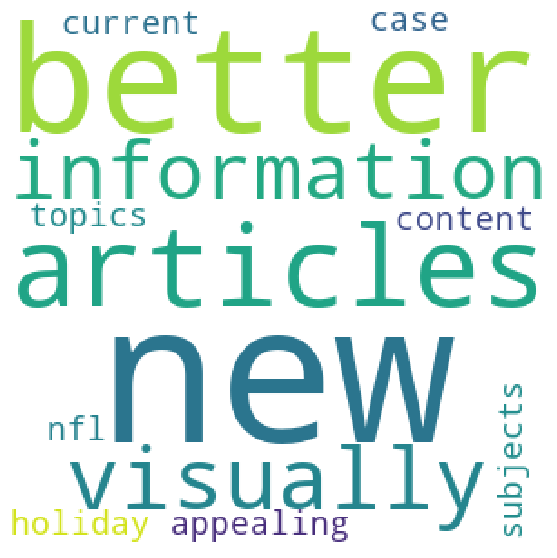

In [14]:
%matplotlib inline
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(txt)
plot_cloud(wordcloud)


'relevant news better sports important feeds political articles good'


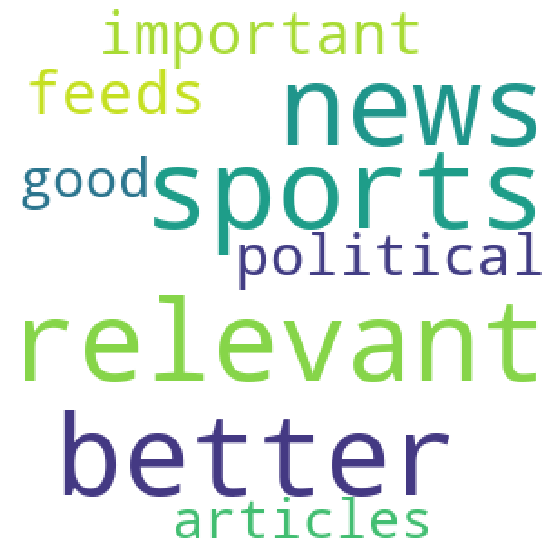

In [15]:
txt1= keywords(text_fl,scores=False,lemmatize =True).replace('\n',' ')
print(txt1)
wordcloud = WordCloud(width = 300, height = 300, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(txt1)
plot_cloud(wordcloud)